In [292]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

excel_name = '附件1 监测点A空气质量预报基础数据.xlsx'
na_values = '—'

data1 = pd.read_excel(excel_name, sheet_name=0,na_values=na_values)
data1.head(3)

,模型运行日期,预测时间,地点,近地2米温度（℃）,地表温度（K）,比湿（kg/kg）,湿度（%）,近地10米风速（m/s）,近地10米风向（°）,雨量（mm）,...,潜热通量（W/m²）,长波辐射（W/m²）,短波辐射（W/m²）,地面太阳能辐射（W/m²）,SO2小时平均浓度(μg/m³),NO2小时平均浓度(μg/m³),PM10小时平均浓度(μg/m³),PM2.5小时平均浓度(μg/m³),O3小时平均浓度(μg/m³),CO小时平均浓度(mg/m³)
0,2020-07-23,2020-07-23 00:00:00,监测点A,29.8890,304.016,0.018870,66.7409,4.16382,162.577,0.0,...,0.94818,428.278,0.0,0.0,2.40151,20.9208,8.17336,5.27729,8.78723,0.124491
1,2020-07-23,2020-07-23 01:00:00,监测点A,29.8736,303.739,0.017556,62.1551,4.65267,171.978,0.0,...,1.14987,427.531,0.0,0.0,1.44834,14.8144,6.49054,4.33106,12.74530,0.109056
2,2020-07-23,2020-07-23 02:00:00,监测点A,29.6471,303.419,0.017874,64.1760,4.10031,172.013,0.0,...,1.01616,427.428,0.0,0.0,1.27161,13.9154,6.86679,4.40045,12.22960,0.105957


In [293]:
data2 = pd.read_excel(excel_name, sheet_name=1, na_values=na_values)
data2.head(3)

,监测时间,地点,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3监测浓度(μg/m³),CO监测浓度(mg/m³),温度(℃),湿度(%),气压(MBar),风速(m/s),风向(°)
0,2019-04-16 00:00:00,监测点A,5.0,75.0,61.0,38.0,1.0,1.0,21.1,89.0,1013.0,1.2,346.5
1,2019-04-16 01:00:00,监测点A,5.0,64.0,60.0,41.0,25.0,0.8,20.4,92.0,1012.4,1.1,18.0
2,2019-04-16 02:00:00,监测点A,4.0,60.0,36.0,40.0,25.0,0.8,20.0,93.0,1011.3,1.1,65.9


In [294]:
data3 = pd.read_excel(excel_name, sheet_name=2, na_values=na_values)
data3.head(3)

,监测日期,地点,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³)
0,2019-04-16,监测点A,5.0,56.0,36.0,31.0,103.0,0.8
1,2019-04-17,监测点A,9.0,63.0,67.0,53.0,206.0,1.1
2,2019-04-18,监测点A,6.0,37.0,31.0,25.0,83.0,0.6


# 数据清洗

## 缺失行补齐算法(不补齐会造成很严重的后果)

In [295]:
start_time = '2019-04-16 00:00:00'
end_time = '2021-07-13 07:00:00'
time_list = pd.date_range(start_time, end_time, freq='H')
print('应有数量',len(time_list))
print('缺失行数量', len(time_list)-len(data2))
print('缺失行比例', 1-len(data2)/len(time_list))

应有数量 19664
缺失行数量 232
缺失行比例 0.01179820992676972


In [296]:
temp_df = data2.copy()
lack_list = list(set(time_list)-set(data2['监测时间']))
lack_df = pd.DataFrame(lack_list,columns=['监测时间'])
temp_df = pd.concat([temp_df,lack_df])
temp_df.sort_values("监测时间",inplace=True)
temp_df.index = list(range(len(temp_df)))
temp_df.shape

(19664, 13)

In [297]:
data2 = temp_df
data2.describe().to_csv('describe1.csv')
data2.describe()

,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3监测浓度(μg/m³),CO监测浓度(mg/m³),温度(℃),湿度(%),气压(MBar),风速(m/s),风向(°)
count,19215.000000,19212.000000,19131.000000,19255.000000,19199.000000,19218.000000,19388.000000,19388.000000,19388.000000,19388.000000,19388.000000
mean,6.991465,32.891526,44.178977,23.635212,54.136674,0.717473,25.013550,69.250258,1010.580039,1.381189,154.554255
std,3.697798,23.995664,27.430644,18.409461,50.955215,0.238143,5.731636,16.147397,6.490778,0.672039,117.741375
min,-2.000000,2.000000,-4.000000,-5.000000,-2.000000,0.100000,5.800000,14.000000,993.500000,0.100000,0.000000
25%,5.000000,16.000000,25.000000,10.000000,17.000000,0.600000,21.000000,60.000000,1005.300000,0.900000,49.200000
50%,6.000000,27.000000,38.000000,19.000000,40.000000,0.700000,26.100000,71.000000,1010.000000,1.300000,108.550000
75%,9.000000,42.000000,58.000000,33.000000,76.000000,0.800000,29.400000,81.000000,1015.600000,1.800000,256.200000
max,47.000000,211.000000,217.000000,163.000000,405.000000,2.500000,38.200000,99.000000,1029.200000,5.800000,360.000000


## 缺失值

In [298]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19664 entries, 0 to 19663
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   监测时间              19664 non-null  datetime64[ns]
 1   地点                19432 non-null  object        
 2   SO2监测浓度(μg/m³)    19215 non-null  float64       
 3   NO2监测浓度(μg/m³)    19212 non-null  float64       
 4   PM10监测浓度(μg/m³)   19131 non-null  float64       
 5   PM2.5监测浓度(μg/m³)  19255 non-null  float64       
 6   O3监测浓度(μg/m³)     19199 non-null  float64       
 7   CO监测浓度(mg/m³)     19218 non-null  float64       
 8   温度(℃)             19388 non-null  float64       
 9   湿度(%)             19388 non-null  float64       
 10  气压(MBar)          19388 non-null  float64       
 11  风速(m/s)           19388 non-null  float64       
 12  风向(°)             19388 non-null  float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 2.1+ MB


In [299]:
print('最大缺失比例：', 1-19131/19664)

最大缺失比例： 0.02710537021969084


In [300]:
data2.isnull().sum().to_csv('info.csv')
data2.isnull().sum()

监测时间                  0
地点                  232
SO2监测浓度(μg/m³)      449
NO2监测浓度(μg/m³)      452
PM10监测浓度(μg/m³)     533
PM2.5监测浓度(μg/m³)    409
O3监测浓度(μg/m³)       465
CO监测浓度(mg/m³)       446
温度(℃)               276
湿度(%)               276
气压(MBar)            276
风速(m/s)             276
风向(°)               276
dtype: int64

### 线性插值

In [301]:
data2.iloc[:,2:] = data2.iloc[:,2:].interpolate()
data2.isnull().sum()

监测时间                  0
地点                  232
SO2监测浓度(μg/m³)        0
NO2监测浓度(μg/m³)        0
PM10监测浓度(μg/m³)       0
PM2.5监测浓度(μg/m³)      0
O3监测浓度(μg/m³)         0
CO监测浓度(mg/m³)         0
温度(℃)                 0
湿度(%)                 0
气压(MBar)              0
风速(m/s)               0
风向(°)                 0
dtype: int64

## 异常值

### 消除负值，不低于边界点0

In [302]:
data2 = data2.applymap(lambda v: max(0,v) if isinstance(v, float) else v)
data2.describe().to_csv('describe2.csv')
data2.describe()

,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3监测浓度(μg/m³),CO监测浓度(mg/m³),温度(℃),湿度(%),气压(MBar),风速(m/s),风向(°)
count,19664.000000,19664.000000,19664.000000,19664.000000,19664.000000,19664.000000,19664.000000,19664.000000,19664.000000,19664.000000,19664.000000
mean,7.002085,32.882552,44.031911,23.588690,54.046125,0.716413,25.013578,69.302075,1010.588047,1.380802,154.056957
std,3.705630,23.865702,27.413365,18.387592,50.858145,0.238045,5.723049,16.128828,6.480650,0.669654,117.411160
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.100000,5.800000,14.000000,993.500000,0.100000,0.000000
25%,5.000000,16.000000,24.000000,10.000000,17.000000,0.600000,21.000000,60.000000,1005.400000,0.900000,49.300000
50%,6.000000,27.000000,38.000000,19.000000,40.000000,0.700000,26.000000,71.000000,1010.000000,1.300000,108.000000
75%,9.000000,42.000000,58.000000,33.000000,76.000000,0.800000,29.400000,81.000000,1015.600000,1.800000,255.700000
max,47.000000,211.000000,217.000000,163.000000,405.000000,2.500000,38.200000,99.000000,1029.200000,5.800000,360.000000


# 特征展示

## 分布图

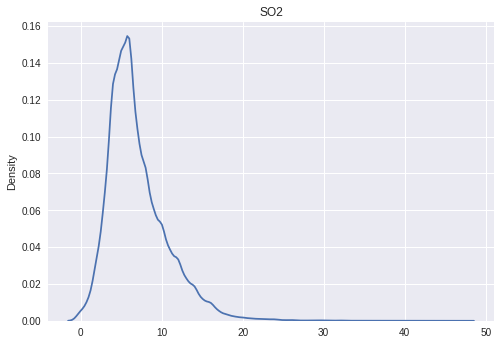

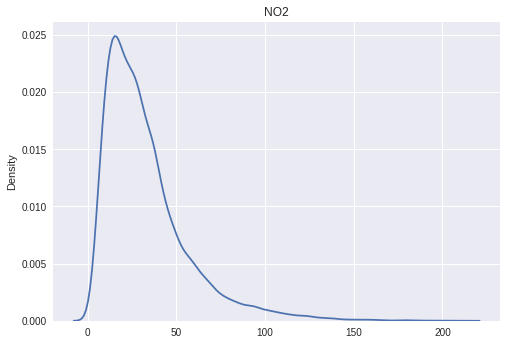

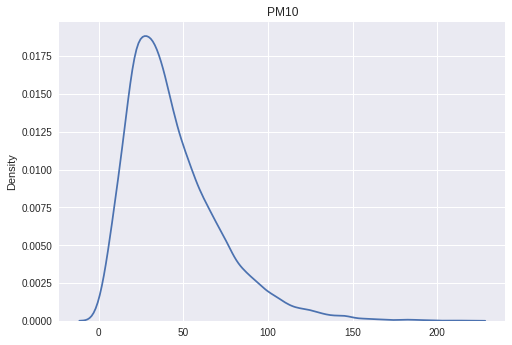

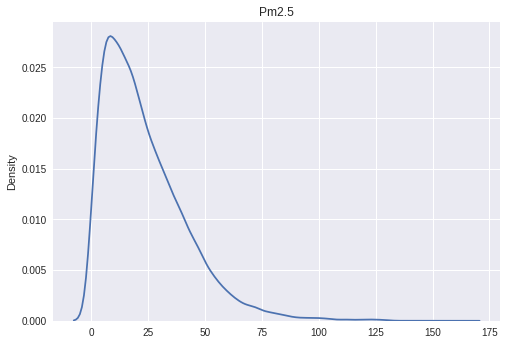

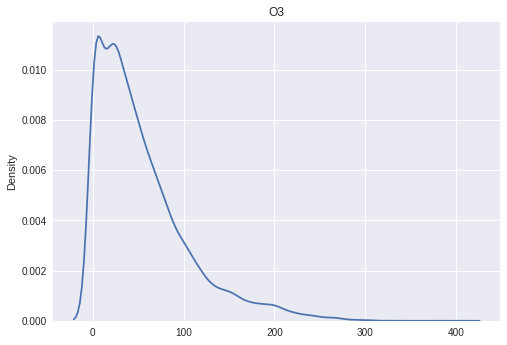

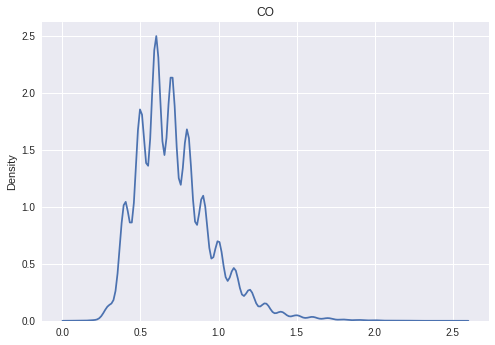

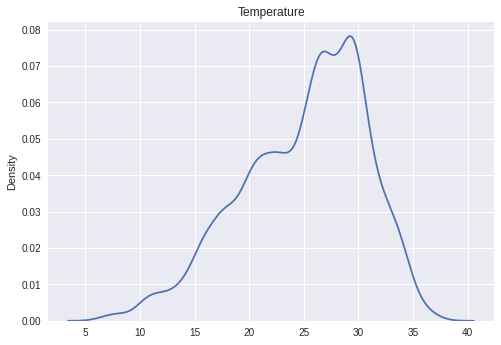

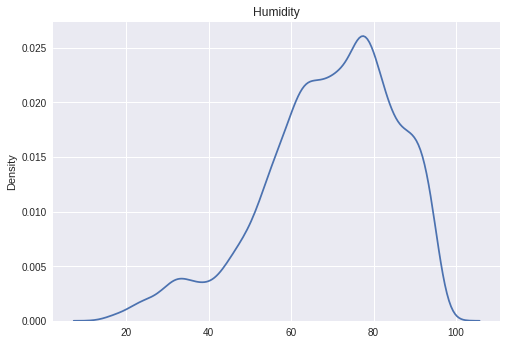

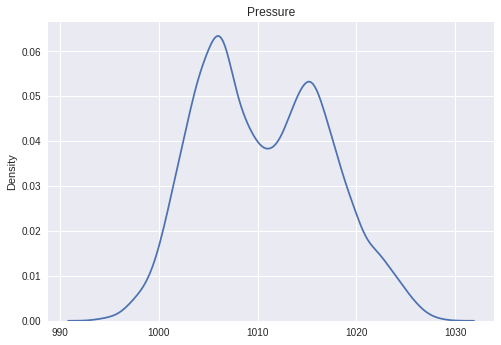

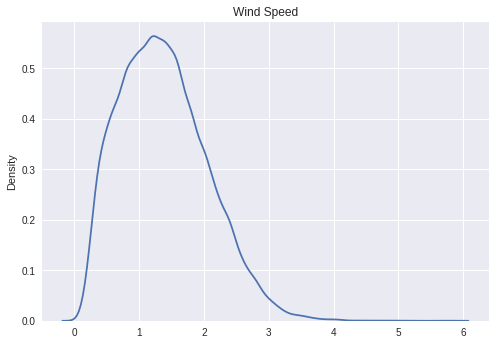

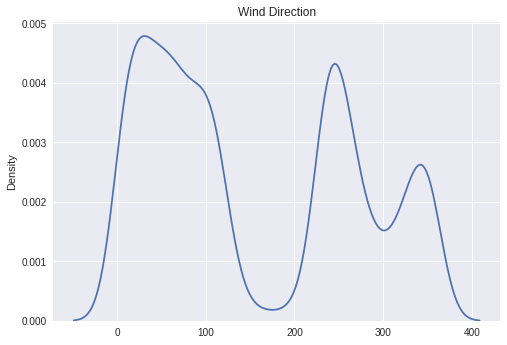

In [303]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

def fkdeplot(vec, name):
    sns.kdeplot(vec)
    plt.title(name, fontsize=12)
    plt.show()

# for i in range(10):
#     fkdeplot(data2.iloc[:,i+2], 'Data')
fkdeplot(data2.iloc[:,2].values, 'SO2')
fkdeplot(data2.iloc[:,3].values, 'NO2')
fkdeplot(data2.iloc[:,4].values, 'PM10')
fkdeplot(data2.iloc[:,5].values, 'Pm2.5')
fkdeplot(data2.iloc[:,6].values, 'O3')
fkdeplot(data2.iloc[:,7].values, 'CO')
fkdeplot(data2.iloc[:,8].values, 'Temperature')
fkdeplot(data2.iloc[:,9].values, 'Humidity')
fkdeplot(data2.iloc[:,10].values, 'Pressure')
fkdeplot(data2.iloc[:,11].values, 'Wind Speed')
fkdeplot(data2.iloc[:,12].values, 'Wind Direction')


## AQI分布图

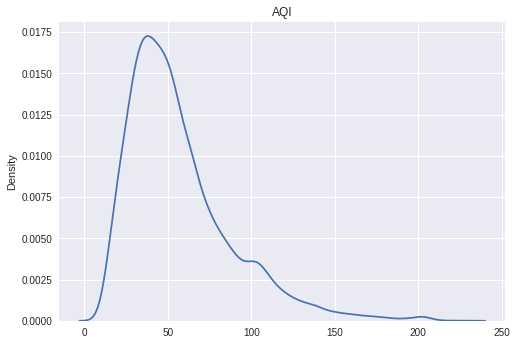

In [304]:
import math

def compute_AQI(a):
    #a=np.array([n_SO2,n_NO2,n_PM10,n_PM25,n_O3,n_CO])
    T=np.array([[0,50,150,475,800,1600,2100,2620],[0,40,80,180,280,565,750,940],[0,50,150,250,350,420,500,600],[0,35,75,115,150,250,350,500],[0,100,160,215,265,800,0,0],[0,2,4,14,24,36,48,60]])
    I=np.array([0,50,100,150,200,300,400,500])
    BP_LO = []
    BP_Hi=[]
    IAQI_LO=[]
    IAQI_Hi=[]
    IAQI=np.zeros((1,6))
    result=[]
    for j in range(6):
        for i in range(1,9):
            if a[j] <= T[j, i]:
                BP_LO.append(T[j, i-1])
                BP_Hi.append(T[j, i])
                IAQI_LO.append(I[i-1])
                IAQI_Hi.append(I[i])
                break
            else:
                continue
        IAQI[0, j] = (IAQI_Hi[j] - IAQI_LO[j]) / (BP_Hi[j] - BP_LO[j]) * (a[j] - BP_LO[j]) + IAQI_LO[j]
        result.append(math.ceil(IAQI[0, j]))
    AQI=np.max(result)
    c=np.argmax(result)
    name=["SO2", "NO2", "PM10", "PM25", "O3", "CO"]
#     if AQI<=50:
#         print("AQI为%d" %(AQI))
#         print("当天无首要污染物")
#     else:
#         print("AQI为%d" % (AQI))
#         print('首要污染物为%s' % (name[c]))
    return AQI
    

AQI = [compute_AQI(inst) for inst in data2.iloc[:,2:8].values]
data2['AQI'] = AQI
fkdeplot(data2.iloc[:,-1].values, 'AQI')


## 展示前100个时刻

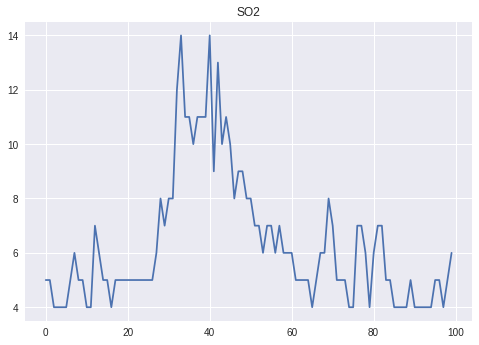

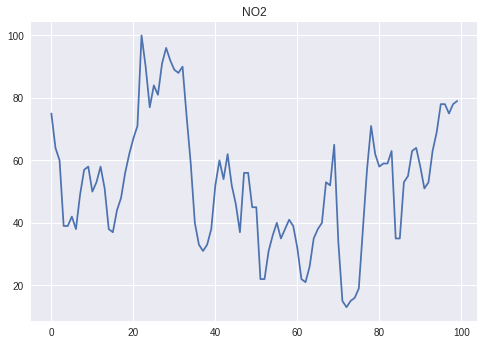

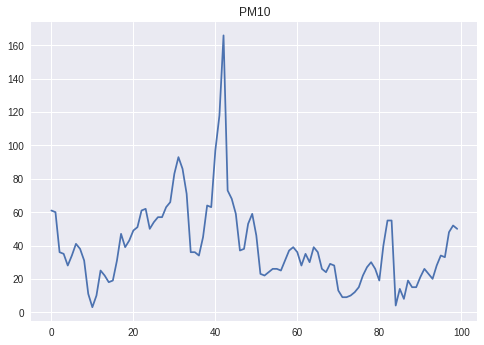

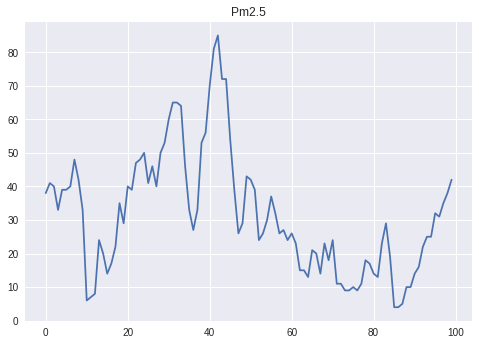

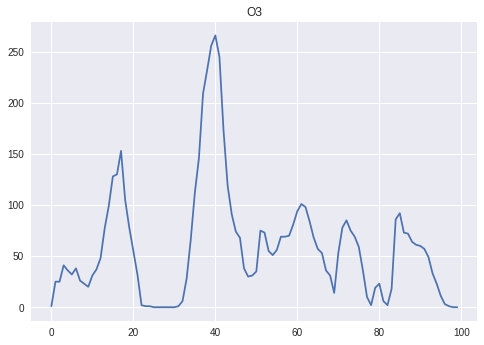

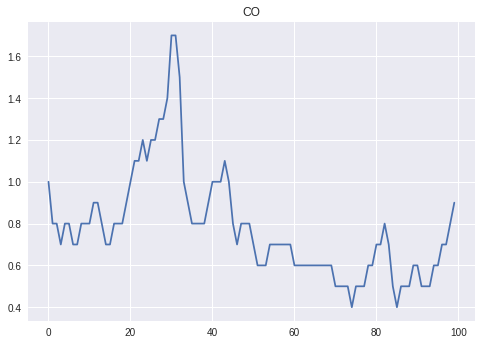

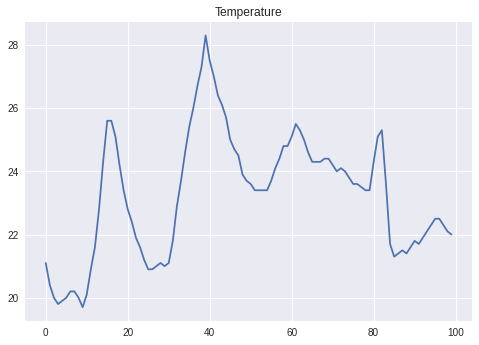

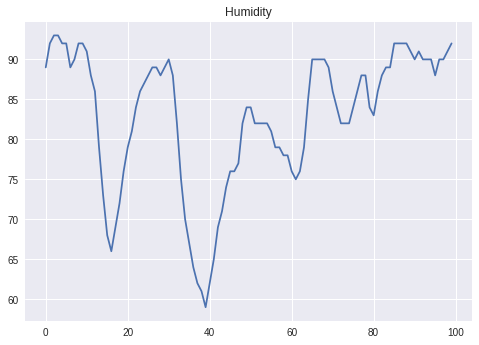

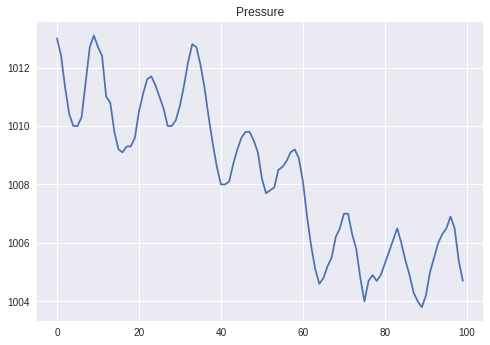

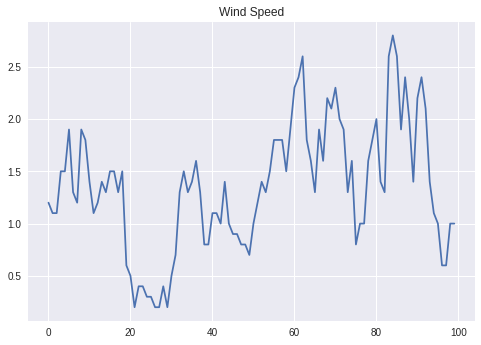

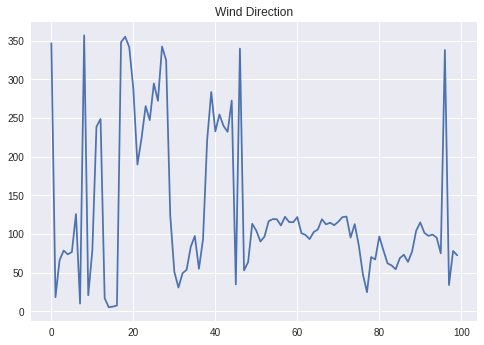

In [305]:
 def fplot(vec, name):
    plt.plot(vec)
    plt.title(name)
    plt.show()

show_num = 100
fplot(data2.iloc[:show_num,2], 'SO2')
fplot(data2.iloc[:show_num,3], 'NO2')
fplot(data2.iloc[:show_num,4], 'PM10')
fplot(data2.iloc[:show_num,5], 'Pm2.5')
fplot(data2.iloc[:show_num,6], 'O3')
fplot(data2.iloc[:show_num,7], 'CO')
fplot(data2.iloc[:show_num,8], 'Temperature')
fplot(data2.iloc[:show_num,9], 'Humidity')
fplot(data2.iloc[:show_num,10], 'Pressure')
fplot(data2.iloc[:show_num,11], 'Wind Speed')
fplot(data2.iloc[:show_num,12], 'Wind Direction')

## 展示AQI的前100个时刻


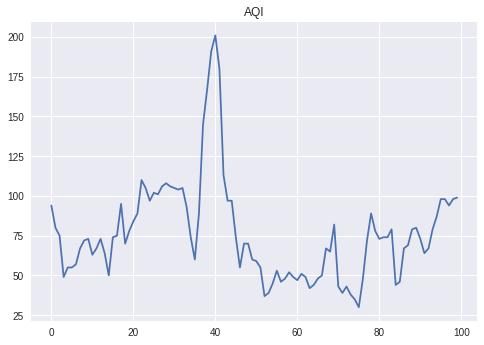

In [306]:
fplot(data2.iloc[:show_num,-1], 'AQI')

# 相关性分析(AQI与气象条件）
pearson相关性

In [307]:
corr = data2.iloc[:,-6:].corr()
corr.describe().to_csv('corr1.csv')
corr

,温度(℃),湿度(%),气压(MBar),风速(m/s),风向(°),AQI
温度(℃),1.000000,0.121228,-0.822499,0.088053,0.115025,-0.050819
湿度(%),0.121228,1.000000,-0.398855,-0.266921,0.017308,-0.396990
气压(MBar),-0.822499,-0.398855,1.000000,-0.033367,-0.161801,0.201942
风速(m/s),0.088053,-0.266921,-0.033367,1.000000,-0.032145,-0.276157
风向(°),0.115025,0.017308,-0.161801,-0.032145,1.000000,-0.077068
AQI,-0.050819,-0.396990,0.201942,-0.276157,-0.077068,1.000000


<AxesSubplot:>

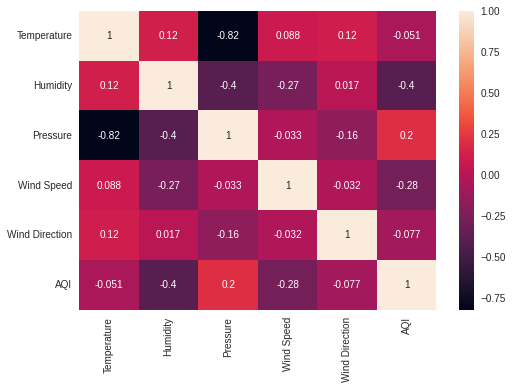

In [308]:
corr.columns = ['Temperature','Humidity','Pressure','Wind Speed','Wind Direction','AQI']
corr.index = corr.columns
sns.heatmap(corr,annot=True)

# 相关性分析(AQI与高级气象条件）

## k小时变压

In [309]:
warm_up = 200
high_level_data = []

total number 19664
data.shape (19646, 19)
total number 19646


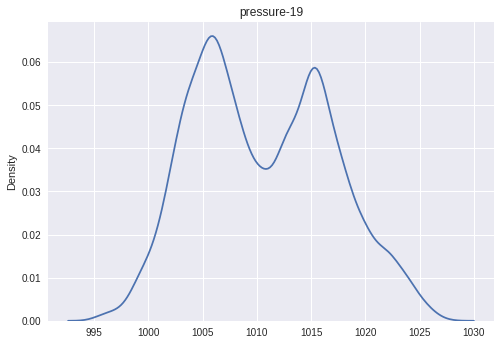

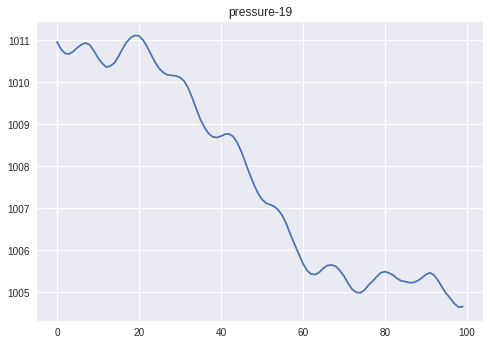

In [310]:
k = 19

def stat_k(pressure_k):
    #temp = pressure_k[-1]-pressure_k[0]
    #temp = np.var(pressure_k)
    temp = np.mean(pressure_k)
    #np.std(pressure_k)/np.mean(pressure_k)
    return temp

pressure_k = []
temp_data = data2.iloc[:,10].values
print('total number', len(temp_data))
for i in range(len(temp_data)-k+1):
    pressure_k.append(temp_data[i:i+k])
pressure_k = np.array(pressure_k)
print('data.shape', pressure_k.shape)  
print('total number', len(pressure_k))  
pressure_k = [stat_k(inst) for inst in pressure_k]
fkdeplot(pressure_k, 'pressure-%d'%k)
fplot(pressure_k[:show_num], 'pressure-%d'%k)
high_level_data.append(pressure_k[warm_up-k:])

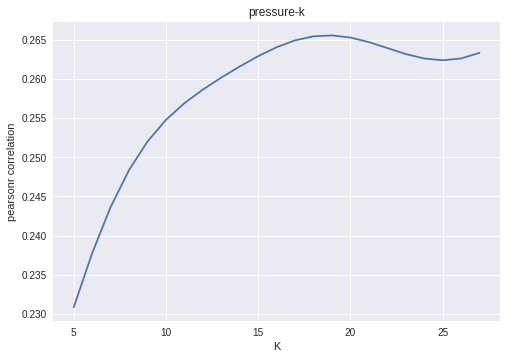

最大(绝对)相关性 0.26556571819433233
最大相关性对应k 19


In [311]:
from scipy.stats import pearsonr

def pressure_k_peasonr(k):
    pressure_k = []
    temp_data = data2.iloc[:,10].values
    #print('total number', len(temp_data))
    for i in range(len(temp_data)-k+1):
        pressure_k.append(temp_data[i:i+k])
    pressure_k = np.array(pressure_k)
    #print('data.shape', pressure_k.shape)  
    #print('total number', len(pressure_k))  
    pressure_k = [stat_k(inst) for inst in pressure_k]
    #print(len(AQI[k-1:]), len(pressure_k))
    temp_pearsonr = pearsonr(AQI[k-1:],pressure_k)[0]
    #print(temp_pearsonr)
    return temp_pearsonr

k_list = []
pearsonr_list = []
for k in range(23):
    temp_k = k+5
    temp_pearsonr = pressure_k_peasonr(temp_k)
    k_list.append(temp_k)
    pearsonr_list.append(temp_pearsonr)
    
plt.plot(k_list, pearsonr_list)
plt.xlabel('K')
plt.ylabel('pearsonr correlation')
plt.title('pressure-k')
plt.show()

idx = np.argmax(np.abs(pearsonr_list))
print('最大(绝对)相关性',pearsonr_list[idx])
print('最大相关性对应k',k_list[idx])

## k小时变温

total number 19664
data.shape (19651, 14)
total number 19651


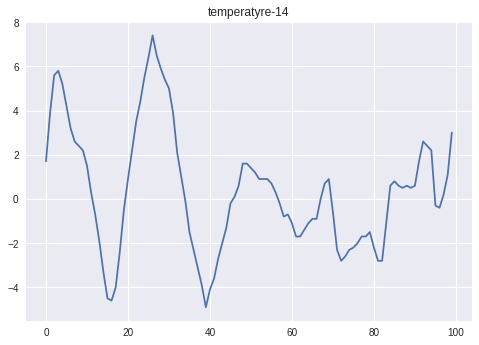

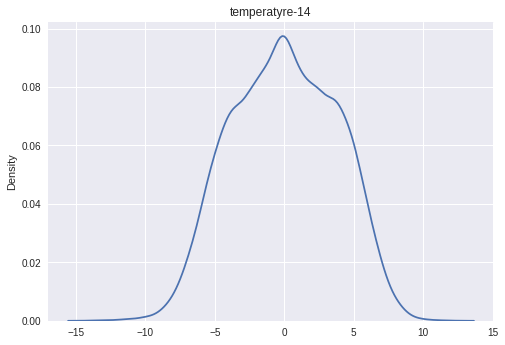

In [312]:
k = 14

def stat_k(pressure_k):
    temp = pressure_k[-1]-pressure_k[0]
    #temp = np.var(pressure_k)
    #temp = np.mean(pressure_k)
    #np.std(pressure_k)/np.mean(pressure_k)
    return temp

pressure_k = []
temp_data = data2.iloc[:,8].values
print('total number', len(temp_data))
for i in range(len(temp_data)-k+1):
    pressure_k.append(temp_data[i:i+k])
pressure_k = np.array(pressure_k)
print('data.shape', pressure_k.shape)  
print('total number', len(pressure_k))  
pressure_k = [stat_k(inst) for inst in pressure_k]
fplot(pressure_k[:show_num], 'temperatyre-%d'%k)
fkdeplot(pressure_k, 'temperatyre-%d'%k)
high_level_data.append(pressure_k[warm_up-k:])

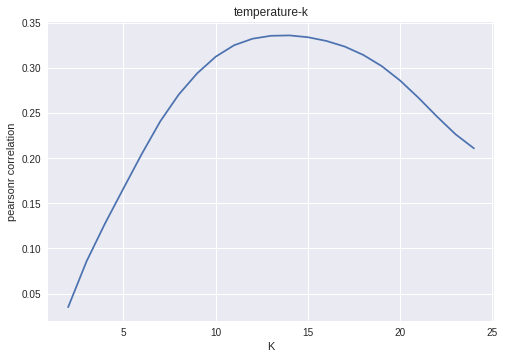

最大(绝对)相关性 0.3360976504579554
最大相关性对应k 14


In [313]:
from scipy.stats import pearsonr

def pressure_k_peasonr(k):
    pressure_k = []
    temp_data = data2.iloc[:,8].values
    #print('total number', len(temp_data))
    for i in range(len(temp_data)-k+1):
        pressure_k.append(temp_data[i:i+k])
    pressure_k = np.array(pressure_k)
    #print('data.shape', pressure_k.shape)  
    #print('total number', len(pressure_k))  
    pressure_k = [stat_k(inst) for inst in pressure_k]
    #print(len(AQI[k-1:]), len(pressure_k))
    temp_pearsonr = pearsonr(AQI[k-1:],pressure_k)[0]
    #print(temp_pearsonr)
    return temp_pearsonr

k_list = []
pearsonr_list = []
for k in range(23):
    temp_k = k+2
    temp_pearsonr = pressure_k_peasonr(temp_k)
    k_list.append(temp_k)
    pearsonr_list.append(temp_pearsonr)
    
plt.plot(k_list, pearsonr_list)
plt.xlabel('K')
plt.ylabel('pearsonr correlation')
plt.title('temperature-k')
plt.show()

idx = np.argmax(np.abs(pearsonr_list))
print('最大(绝对)相关性',pearsonr_list[idx])
print('最大相关性对应k',k_list[idx])

## k小时平均风速

total number 19664
data.shape (19646, 19)
total number 19646


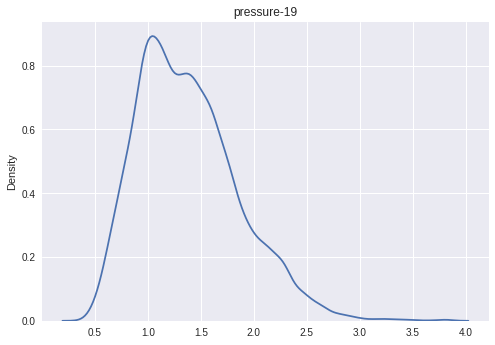

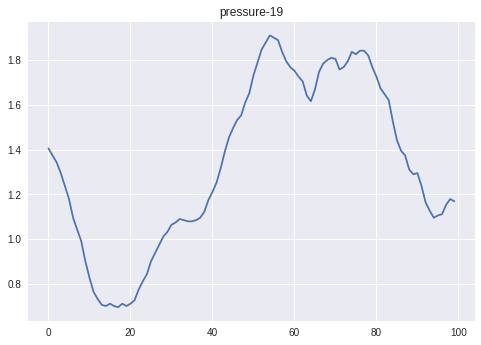

In [314]:
k = 19

def stat_k(pressure_k):
    temp = np.mean(pressure_k)
    return temp

pressure_k = []
temp_data = data2.iloc[:,11].values
print('total number', len(temp_data))
for i in range(len(temp_data)-k+1):
    pressure_k.append(temp_data[i:i+k])
pressure_k = np.array(pressure_k)
print('data.shape', pressure_k.shape)  
print('total number', len(pressure_k))  
pressure_k = [stat_k(inst) for inst in pressure_k]
fkdeplot(pressure_k, 'pressure-%d'%k)
fplot(pressure_k[:show_num], 'pressure-%d'%k)
high_level_data.append(pressure_k[warm_up-k:])

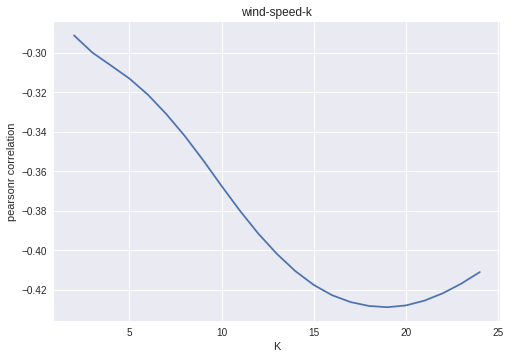

最大(绝对)相关性 -0.428828189203452
最大相关性对应k 19


In [315]:
from scipy.stats import pearsonr

def pressure_k_peasonr(k):
    pressure_k = []
    temp_data = data2.iloc[:,11].values
    #print('total number', len(temp_data))
    for i in range(len(temp_data)-k+1):
        pressure_k.append(temp_data[i:i+k])
    pressure_k = np.array(pressure_k)
    #print('data.shape', pressure_k.shape)  
    #print('total number', len(pressure_k))  
    pressure_k = [stat_k(inst) for inst in pressure_k]
    #print(len(AQI[k-1:]), len(pressure_k))
    temp_pearsonr = pearsonr(AQI[k-1:],pressure_k)[0]
    #print(temp_pearsonr)
    return temp_pearsonr

k_list = []
pearsonr_list = []
for k in range(23):
    temp_k = k+2
    temp_pearsonr = pressure_k_peasonr(temp_k)
    k_list.append(temp_k)
    pearsonr_list.append(temp_pearsonr)
    
plt.plot(k_list, pearsonr_list)
plt.xlabel('K')
plt.ylabel('pearsonr correlation')
plt.title('wind-speed-k')
plt.show()

idx = np.argmax(np.abs(pearsonr_list))
print('最大(绝对)相关性',pearsonr_list[idx])
print('最大相关性对应k',k_list[idx])

## k小时平均湿度

total number 19664
data.shape (19663, 2)
total number 19663


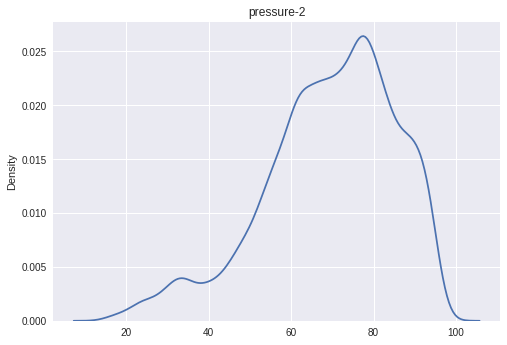

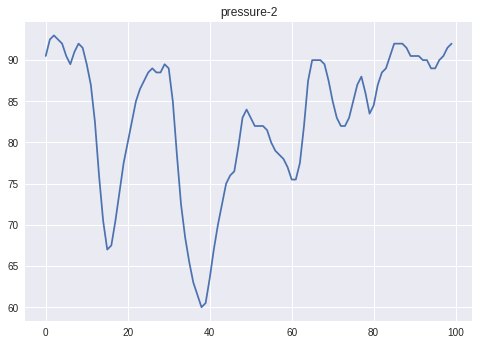

In [316]:
k = 2

def stat_k(pressure_k):
    temp = np.mean(pressure_k)
    return temp

pressure_k = []
temp_data = data2.iloc[:,9].values
print('total number', len(temp_data))
for i in range(len(temp_data)-k+1):
    pressure_k.append(temp_data[i:i+k])
pressure_k = np.array(pressure_k)
print('data.shape', pressure_k.shape)  
print('total number', len(pressure_k))  
pressure_k = [stat_k(inst) for inst in pressure_k]
fkdeplot(pressure_k, 'pressure-%d'%k)
fplot(pressure_k[:show_num], 'pressure-%d'%k)

high_level_data.append(pressure_k[warm_up-k:])

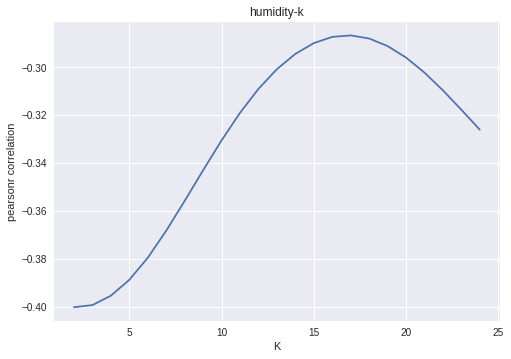

最大(绝对)相关性 -0.400286136391407
最大相关性对应k 2


In [317]:
from scipy.stats import pearsonr

def pressure_k_peasonr(k):
    pressure_k = []
    temp_data = data2.iloc[:,9].values
    #print('total number', len(temp_data))
    for i in range(len(temp_data)-k+1):
        pressure_k.append(temp_data[i:i+k])
    pressure_k = np.array(pressure_k)
    #print('data.shape', pressure_k.shape)  
    #print('total number', len(pressure_k))  
    pressure_k = [stat_k(inst) for inst in pressure_k]
    #print(len(AQI[k-1:]), len(pressure_k))
    temp_pearsonr = pearsonr(AQI[k-1:],pressure_k)[0]
    #print(temp_pearsonr)
    return temp_pearsonr

k_list = []
pearsonr_list = []
for k in range(23):
    temp_k = k+2
    temp_pearsonr = pressure_k_peasonr(temp_k)
    k_list.append(temp_k)
    pearsonr_list.append(temp_pearsonr)
    
plt.plot(k_list, pearsonr_list)
plt.xlabel('K')
plt.ylabel('pearsonr correlation')
plt.title('humidity-k')
plt.show()

idx = np.argmax(np.abs(pearsonr_list))
print('最大(绝对)相关性',pearsonr_list[idx])
print('最大相关性对应k',k_list[idx])

## k小时风向一致性

total number 19664
data.shape (19483, 182)
total number 19483


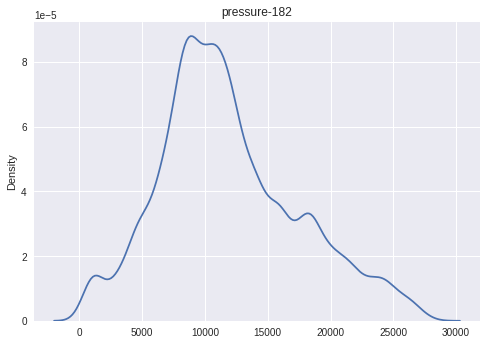

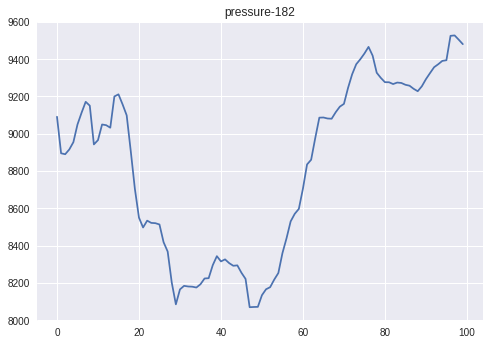

In [318]:
from itertools import combinations

k = 182

def angle_minute_drift(alpha, beta):
    if max(alpha, beta)-min(alpha, beta)<180:
        result = max(alpha, beta)-min(alpha, beta)
    else:
        result = min(alpha, beta)-max(alpha, beta)+360
    return result

def drift_direction(pressure_k):
    combine_list = list(combinations(pressure_k, 2))
    return np.array([angle_minute_drift(i, j) for i,j in combine_list])

def stat_k(pressure_k):
    #pressure_k = drift_direction(pressure_k)
    temp = np.var(pressure_k)
    return temp

pressure_k = []
temp_data = data2.iloc[:,12].values
print('total number', len(temp_data))
for i in range(len(temp_data)-k+1):
    pressure_k.append(temp_data[i:i+k])
pressure_k = np.array(pressure_k)
print('data.shape', pressure_k.shape)  
print('total number', len(pressure_k))  
pressure_k = [stat_k(inst) for inst in pressure_k]
fkdeplot(pressure_k, 'pressure-%d'%k)
fplot(pressure_k[:show_num], 'pressure-%d'%k)
high_level_data.append(pressure_k[warm_up-k:])

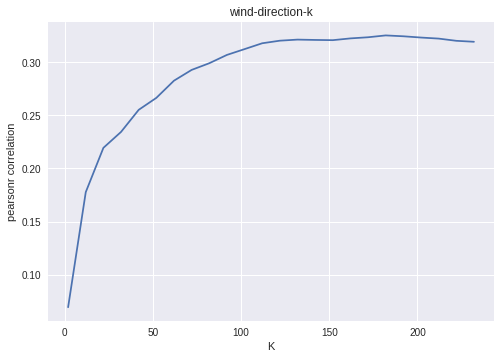

最大(绝对)相关性 0.325509024532027
最大相关性对应k 182


In [319]:
from scipy.stats import pearsonr

def pressure_k_peasonr(k):
    pressure_k = []
    temp_data = data2.iloc[:,12].values
    #print('total number', len(temp_data))
    for i in range(len(temp_data)-k+1):
        pressure_k.append(temp_data[i:i+k])
    pressure_k = np.array(pressure_k)
    #print('data.shape', pressure_k.shape)  
    #print('total number', len(pressure_k))  
    pressure_k = [stat_k(inst) for inst in pressure_k]
    #print(len(AQI[k-1:]), len(pressure_k))
    temp_pearsonr = pearsonr(AQI[k-1:],pressure_k)[0]
    #print(temp_pearsonr)
    return temp_pearsonr

k_list = []
pearsonr_list = []
for k in range(24):
    temp_k = k*10+2
    temp_pearsonr = pressure_k_peasonr(temp_k)
    k_list.append(temp_k)
    pearsonr_list.append(temp_pearsonr)
    
plt.plot(k_list, pearsonr_list)
plt.xlabel('K')
plt.ylabel('pearsonr correlation')
plt.title('wind-direction-k')
plt.show()

idx = np.argmax(np.abs(pearsonr_list))
print('最大(绝对)相关性',pearsonr_list[idx])
print('最大相关性对应k',k_list[idx])

# SWI静稳天气指数

## 数据准备，得按照刚刚的结果抽取高级气象条件

In [320]:
high_level_data.append(AQI[warm_up-1:])
high_level_data = np.array(high_level_data)
high_level_data.shape

(6, 19465)

In [321]:
high_level_data = pd.DataFrame(high_level_data).T
high_level_data.columns = ['Pressure','Temperature','Wind Speed','Humidity','Wind Direction','AQI']
high_level_data

,Pressure,Temperature,Wind Speed,Humidity,Wind Direction,AQI
0,1007.184211,-3.5,1.563158,82.5,8906.482768,28.0
1,1007.278947,-1.4,1.557895,78.5,8704.680014,30.0
2,1007.431579,0.1,1.521053,73.5,8550.376673,28.0
3,1007.600000,2.0,1.500000,67.5,8497.789034,27.0
4,1007.763158,3.3,1.447368,62.5,8534.370602,42.0
...,...,...,...,...,...,...
19460,1007.126316,-3.8,1.394737,77.5,6346.810581,15.0
19461,1006.947368,-4.1,1.368421,78.0,6419.842724,19.0
19462,1006.784211,-4.4,1.331579,78.0,6500.809360,24.0
19463,1006.657895,-4.5,1.284211,79.5,6601.465933,25.0


# 高级气象条件与AQI相关性

In [322]:
corr = high_level_data.corr()
corr.to_csv('corr2.csv')
corr

,Pressure,Temperature,Wind Speed,Humidity,Wind Direction,AQI
Pressure,1.000000,0.036611,-0.048755,-0.459716,0.703132,0.268137
Temperature,0.036611,1.000000,-0.133695,-0.463726,0.010452,0.336909
Wind Speed,-0.048755,-0.133695,1.000000,-0.138363,-0.088807,-0.429505
Humidity,-0.459716,-0.463726,-0.138363,1.000000,-0.409287,-0.407127
Wind Direction,0.703132,0.010452,-0.088807,-0.409287,1.000000,0.325308
AQI,0.268137,0.336909,-0.429505,-0.407127,0.325308,1.000000


<AxesSubplot:>

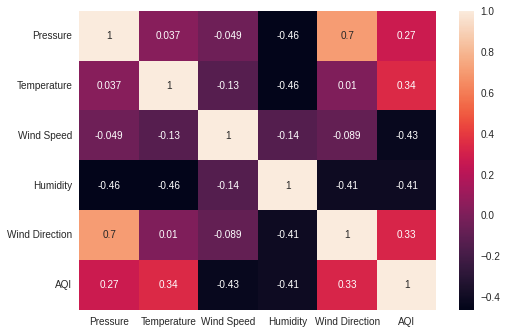

In [323]:
corr.columns = ['Pressure','Temperature','Wind Speed','Humidity','Wind Direction','AQI']
corr.index = corr.columns
sns.heatmap(corr,annot=True)

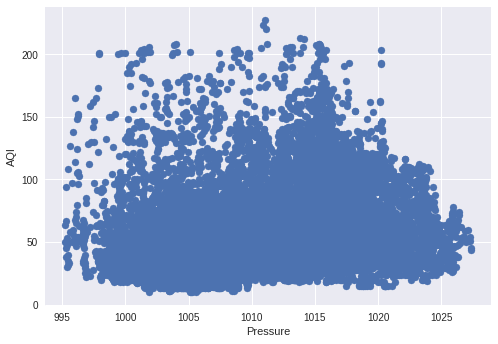

In [324]:
plt.scatter(x=high_level_data['Pressure'], y=high_level_data['AQI'])
plt.ylabel('AQI')
plt.xlabel('Pressure')
plt.show()

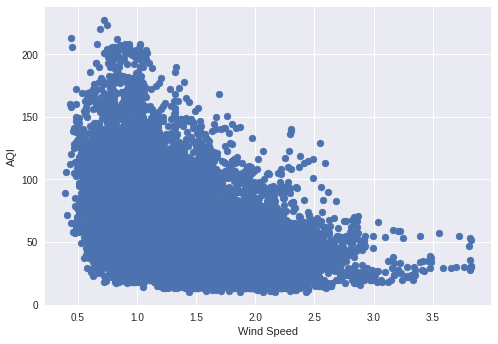

In [325]:
plt.scatter(x=high_level_data['Wind Speed'], y=high_level_data['AQI'])
plt.ylabel('AQI')
plt.xlabel('Wind Speed')
plt.show()

## 归一化

In [326]:
from sklearn.preprocessing import MinMaxScaler

y = high_level_data.iloc[:,-1]
x = high_level_data.iloc[:,:-1]
#minmaxscaler
mm_x= MinMaxScaler()
mm_y= MinMaxScaler()
x = mm_x.fit_transform(x)
y = mm_y.fit_transform(np.reshape(y.values, (-1, 1)))

## 划分训练集测试集

In [327]:
cut = 1000
x_train,y_train,x_test,y_test=\
x[:-cut],y[:-cut],x[-cut:],y[-cut:]
print('x_train.shape',x_train.shape)
print('x_test.shape',x_test.shape)
print('y_train.shape',y_train.shape)
print('y_test.shape',y_test.shape)

x_train.shape (18465, 5)
x_test.shape (1000, 5)
y_train.shape (18465, 1)
y_test.shape (1000, 1)


## 线性回归

In [328]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train, y_train)

LinearRegression()

In [329]:
clf.coef_

array([[-0.03138117,  0.10483539, -0.47989227, -0.28947373,  0.10552132]])

In [330]:
clf.intercept_

array([0.45808438])

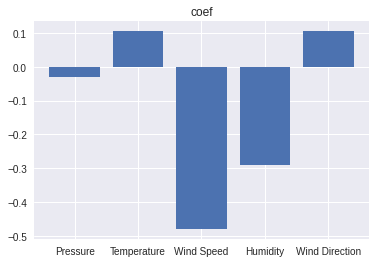

In [331]:
plt.figure(figsize=(6,4))
plt.bar(['Pressure','Temperature','Wind Speed','Humidity','Wind Direction'],clf.coef_[0,:])
plt.title('coef')
plt.show()

In [332]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

def mape(y_true, y_pred): 
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
    return mape

def easy_result(y_train, y_train_predict, train_index, model_index, show_num):
    #画图进行展示
    y_train_predict=np.reshape(y_train_predict, (-1,1))  
    y_train_predict= mm_y.inverse_transform(y_train_predict)
    y_train_predict=y_train_predict[:,0]
    y_train=np.reshape(y_train, (-1,1))  
    y_train=mm_y.inverse_transform(y_train)
    y_train=y_train[:,0]

    plt.figure(figsize=(10,2))
    plt.plot(y_train[-show_num:])
    plt.plot(y_train_predict[-show_num:])
    plt.legend(('real', 'predict'),fontsize='15')
    plt.title("%s Data"%train_index,fontsize='20') #添加标题
    plt.show()
    print('\n')

    plot_begin,plot_end=min(min(y_train),min(y_train_predict)),max(max(y_train),max(y_train_predict))
    plot_x=np.linspace(plot_begin,plot_end,10)
    plt.figure(figsize=(5,5))
    plt.plot(plot_x,plot_x)
    plt.plot(y_train,y_train_predict,'o')
    plt.title("%s Data"%train_index,fontsize='20') #添加标题
    plt.show()

    #输出结果
    print('%s上的MAE/RMSE/MAPE/R^2'%train_index)
    print(mean_absolute_error(y_train, y_train_predict))
    print(np.sqrt(mean_squared_error(y_train, y_train_predict) ))
    print(mape(y_train, y_train_predict) )
    print(r2_score(y_train, y_train_predict))


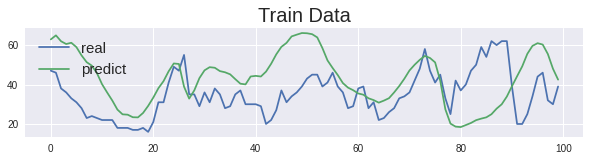

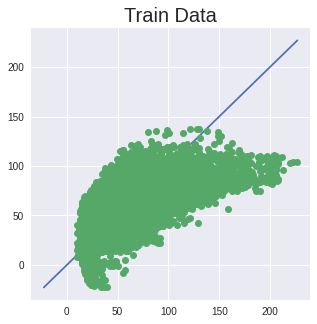

Train上的MAE/RMSE/MAPE/R^2
18.157374549679083
24.014708822151974
37.60341510496897
0.42216412350297283


In [333]:
y_train_predict=clf.predict(x_train)#预测结果
easy_result(y_train,y_train_predict,'Train','Linear Model',100)#输出评价指标 

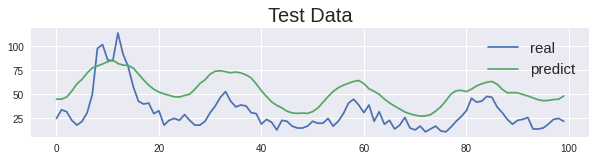

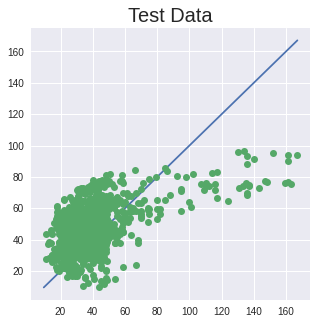

Test上的MAE/RMSE/MAPE/R^2
15.527419764220195
20.130967070837603
45.373077078958914
0.16682712038293812


In [334]:
y_test_predict=clf.predict(x_test)#预测结果
easy_result(y_test,y_test_predict,'Test','Linear Model',100)#输出评价指标 

## 岭回归 为了避免多重共线性

In [335]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.1)
clf.fit(x_train, y_train)

Ridge(alpha=0.1)

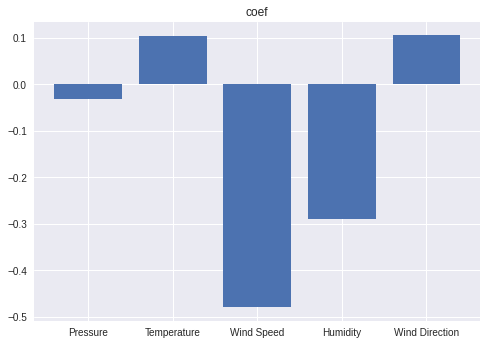

In [336]:
plt.bar(['Pressure','Temperature','Wind Speed','Humidity','Wind Direction'],clf.coef_[0,:])
plt.title('coef')
plt.show()

In [337]:
clf.coef_

array([[-0.03132571,  0.10488888, -0.47973084, -0.28936977,  0.10551799]])

In [338]:
clf.intercept_

array([0.45791661])

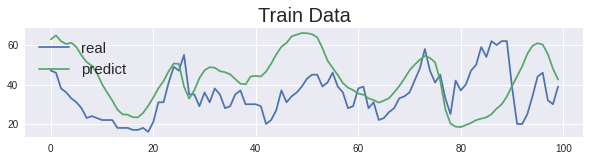

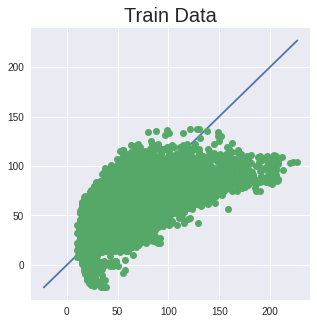

Train上的MAE/RMSE/MAPE/R^2
18.15709905733076
24.014709374383123
37.60269235269493
0.42216409692767876


In [339]:
y_train_predict=clf.predict(x_train)#预测结果
easy_result(y_train,y_train_predict,'Train','Linear Model',100)#输出评价指标 

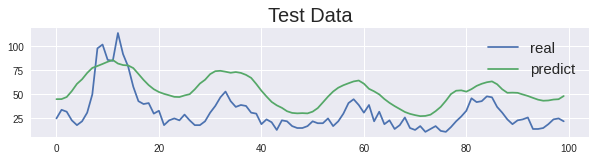

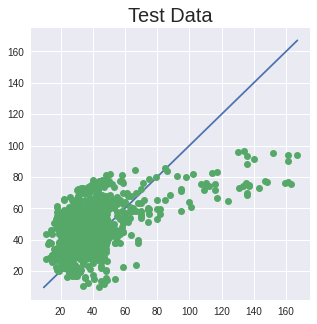

Test上的MAE/RMSE/MAPE/R^2
15.527050821973484
20.130623208080642
45.372416636593286
0.16685558346427265


In [340]:
y_test_predict=clf.predict(x_test)#预测结果
easy_result(y_test,y_test_predict,'Test','Linear Model',100)#输出评价指标 

## SWI静稳天气指数

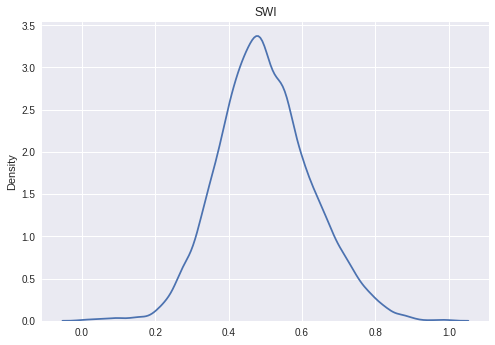

In [341]:
yy = clf.predict(x)
yy=np.reshape(yy, (-1,1))  
#y= mm_y.inverse_transform(y)
#minmaxscaler
mm_yy= MinMaxScaler()
yy = mm_yy.fit_transform(np.reshape(yy, (-1, 1)))
yy = yy[:,0]
fkdeplot(yy, 'SWI')

# 对SWI指数进行聚类得到天气类别

### GMM

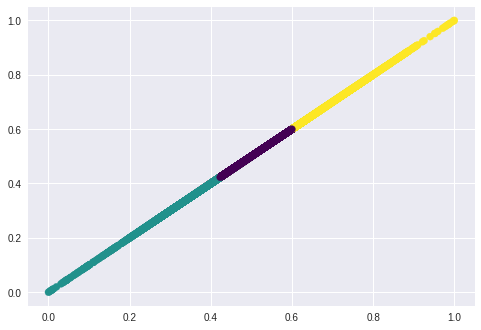

In [342]:
from sklearn.mixture import GaussianMixture as GMM

c=3
temp = yy.reshape(-1,1)
gmm = GMM(n_components=c).fit(temp)
labels = gmm.predict(temp)
plt.scatter(temp[:,0], temp[:,0], c=labels, s=50, cmap='viridis')

In [343]:
result = pd.DataFrame(np.array([temp[:,0],labels]).T)
result

,0,1
0,0.373132,1.0
1,0.402825,1.0
2,0.440002,0.0
3,0.481483,0.0
4,0.521530,0.0
...,...,...
19460,0.413277,1.0
19461,0.414931,1.0
19462,0.420899,1.0
19463,0.423086,0.0


## 分界点

In [344]:
result.groupby(1).describe().to_csv('gmm_bound.csv')
result.groupby(1).describe()

0                                                              \
       count      mean       std       min       25%       50%       75%   
1                                                                          
0.0  10181.0  0.505703  0.049574  0.422698  0.463916  0.501737  0.546842   
1.0   5364.0  0.350606  0.062377  0.000000  0.321040  0.365903  0.397834   
2.0   3920.0  0.683303  0.066153  0.601674  0.631131  0.667821  0.720276   

               
          max  
1              
0.0  0.601664  
1.0  0.422678  
2.0  1.000000

In [345]:
df0,df1,df2 = result.groupby(1)

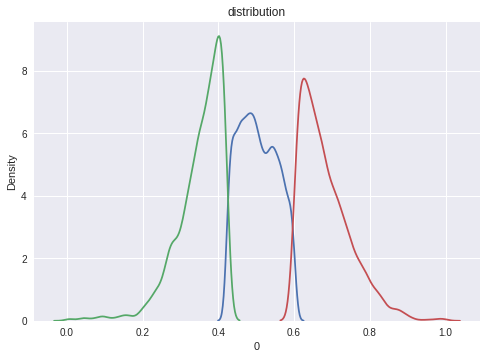

In [346]:
# fkdeplot(df0[-1][0], '1')
# fkdeplot(df1[-1][0], '2')
# fkdeplot(df2[-1][0], '-1')
sns.kdeplot(df0[-1][0])
sns.kdeplot(df1[-1][0])
sns.kdeplot(df2[-1][0])
plt.title('distribution', fontsize=12)
plt.show()

### KMeans

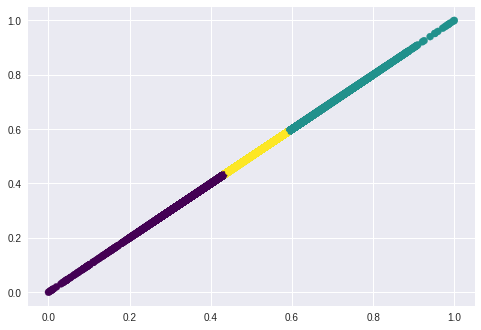

In [347]:
from sklearn.cluster import KMeans

c=3
temp = np.array([yy,yy]).T
kmeans_model = KMeans(n_clusters=c, random_state=1).fit(temp)
labels = kmeans_model.labels_
plt.scatter(temp[:,0], temp[:,1], c=labels, s=50, cmap='viridis')


## Case Study

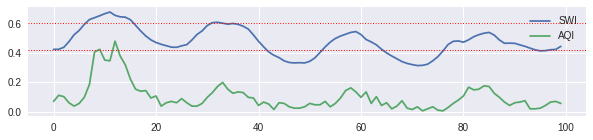

In [348]:
show_num =100
plt.figure(figsize=(10,2))
plt.plot(yy[-show_num:], label='SWI')
plt.plot(y[-show_num:,0], label='AQI')
plt.axhline(0.42, linestyle="dotted", linewidth=1, color='r')
plt.axhline(0.60, linestyle="dotted", linewidth=1, color='r')
plt.legend()
plt.show()

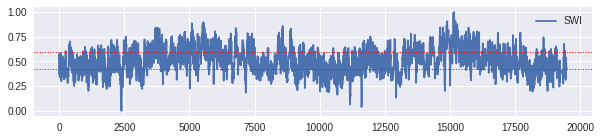

In [349]:
show_num = 0
plt.figure(figsize=(10,2))
plt.plot(yy[-show_num:], label='SWI')
plt.axhline(0.42, linestyle="dotted", linewidth=1, color='r')
plt.axhline(0.60, linestyle="dotted", linewidth=1, color='r')
plt.legend()
plt.show()

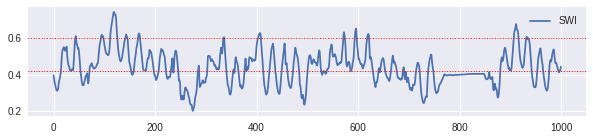

In [350]:
show_num =1000
plt.figure(figsize=(10,2))
plt.plot(yy[-show_num:], label='SWI')
plt.axhline(0.42, linestyle="dotted", linewidth=1, color='r')
plt.axhline(0.60, linestyle="dotted", linewidth=1, color='r')
plt.legend()
plt.show()

# 各个因子分类别统计

In [351]:
result_stat = high_level_data.iloc[:,:-1]
result_stat['classes'] = result[1]
result_stat

,Pressure,Temperature,Wind Speed,Humidity,Wind Direction,classes
0,1007.184211,-3.5,1.563158,82.5,8906.482768,1.0
1,1007.278947,-1.4,1.557895,78.5,8704.680014,1.0
2,1007.431579,0.1,1.521053,73.5,8550.376673,0.0
3,1007.600000,2.0,1.500000,67.5,8497.789034,0.0
4,1007.763158,3.3,1.447368,62.5,8534.370602,0.0
...,...,...,...,...,...,...
19460,1007.126316,-3.8,1.394737,77.5,6346.810581,1.0
19461,1006.947368,-4.1,1.368421,78.0,6419.842724,1.0
19462,1006.784211,-4.4,1.331579,78.0,6500.809360,1.0
19463,1006.657895,-4.5,1.284211,79.5,6601.465933,0.0


In [352]:
result_stat.groupby('classes').describe().to_csv('factor_stat.csv')
result_stat.groupby('classes').describe()

Pressure                                                               \
           count         mean       std         min          25%          50%   
classes                                                                         
0.0      10181.0  1010.748760  6.266851  995.268421  1005.773684  1010.484211   
1.0       5364.0  1007.697001  5.587913  995.263158  1003.761842  1006.166129   
2.0       3920.0  1014.292354  5.716416  995.342105  1010.978947  1015.176316   

                                  Temperature            ... Humidity        \
                 75%          max       count      mean  ...      75%   max   
classes                                                  ...                  
0.0      1015.647368  1027.347368     10181.0  0.016123  ...     80.5  99.0   
1.0      1010.884868  1027.268421      5364.0 -2.299479  ...     87.5  98.0   
2.0      1018.057895  1026.131579      3920.0  3.113304  ...     62.0  89.5   

        Wind Direction                                                        \
                 count          mean          std          min           25%   
classes                                                                        
0.0            10181.0  11975.097547  5099.606404   353.971114   8530.963709   
1.0             5364.0   8819.486057  4664.585494   292.162354   5998.127944   
2.0             3920.0  15820.124732  5181.477958  2070.092960  11782.659741   

                                                   
                  50%           75%           max  
classes                                            
0.0      11184.008305  14649.142128  27671.402390  
1.0       8457.302774  10791.087329  26419.719135  
2.0      15677.396374  19501.060578  27998.367586  

[3 rows x 40 columns]

In [353]:
temp1, temp2, temp3 = result_stat.groupby('classes')

In [354]:
temp1[-1]

,Pressure,Temperature,Wind Speed,Humidity,Wind Direction,classes
2,1007.431579,0.1,1.521053,73.5,8550.376673,0.0
3,1007.600000,2.0,1.500000,67.5,8497.789034,0.0
4,1007.763158,3.3,1.447368,62.5,8534.370602,0.0
5,1007.884211,3.9,1.415789,60.5,8522.337741,0.0
6,1007.936842,5.0,1.421053,58.5,8520.865031,0.0
...,...,...,...,...,...,...
19456,1007.647368,-1.9,1.363158,71.0,5403.475064,0.0
19457,1007.563158,-2.1,1.378947,72.5,5593.995775,0.0
19458,1007.463158,-1.8,1.410526,74.5,5808.322670,0.0
19463,1006.657895,-4.5,1.284211,79.5,6601.465933,0.0


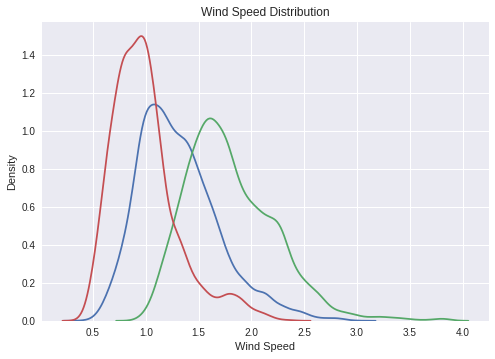

In [355]:
sns.kdeplot(temp1[-1]['Wind Speed'])
sns.kdeplot(temp2[-1]['Wind Speed'])
sns.kdeplot(temp3[-1]['Wind Speed'])
plt.title('Wind Speed Distribution', fontsize=12)
plt.show()

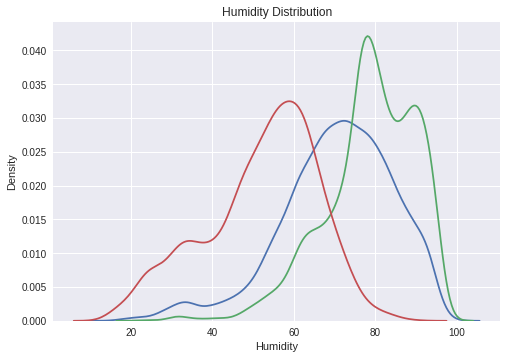

In [356]:
sns.kdeplot(temp1[-1]['Humidity'])
sns.kdeplot(temp2[-1]['Humidity'])
sns.kdeplot(temp3[-1]['Humidity'])
plt.title('Humidity Distribution', fontsize=12)
plt.show()

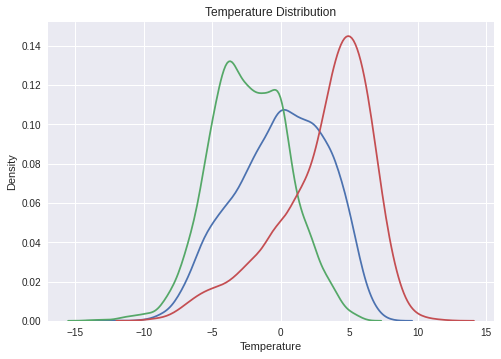

In [357]:
sns.kdeplot(temp1[-1]['Temperature'])
sns.kdeplot(temp2[-1]['Temperature'])
sns.kdeplot(temp3[-1]['Temperature'])
plt.title('Temperature Distribution', fontsize=12)
plt.show()

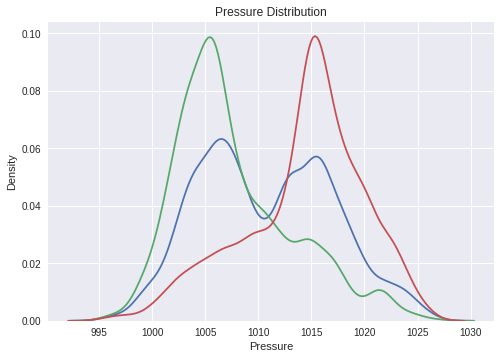

In [358]:
sns.kdeplot(temp1[-1]['Pressure'])
sns.kdeplot(temp2[-1]['Pressure'])
sns.kdeplot(temp3[-1]['Pressure'])
plt.title('Pressure Distribution', fontsize=12)
plt.show()